# Task 5: Exploratory Data Analysis (EDA) on Bank Customer Churn Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

### 1. Basic Exploration

In [3]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Statistical Summary ---")
print(df.describe())

print("\n--- Churn Distribution ---")
print(df['churn'].value_counts(normalize=True))


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None

--- Missing Values ---
customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure   

### 2.Pairplot & Heatmap

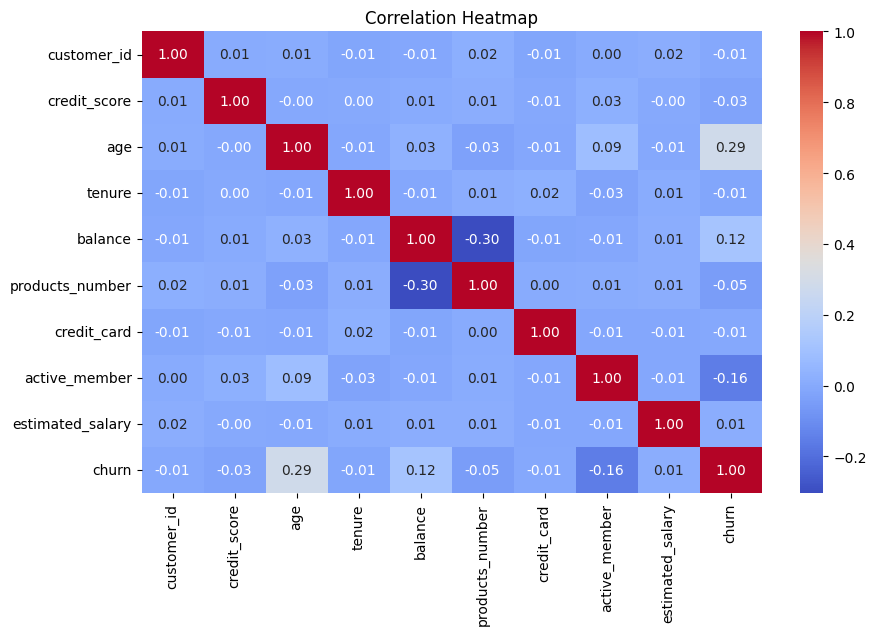

In [10]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['int64','float64'])   # keep only numeric
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

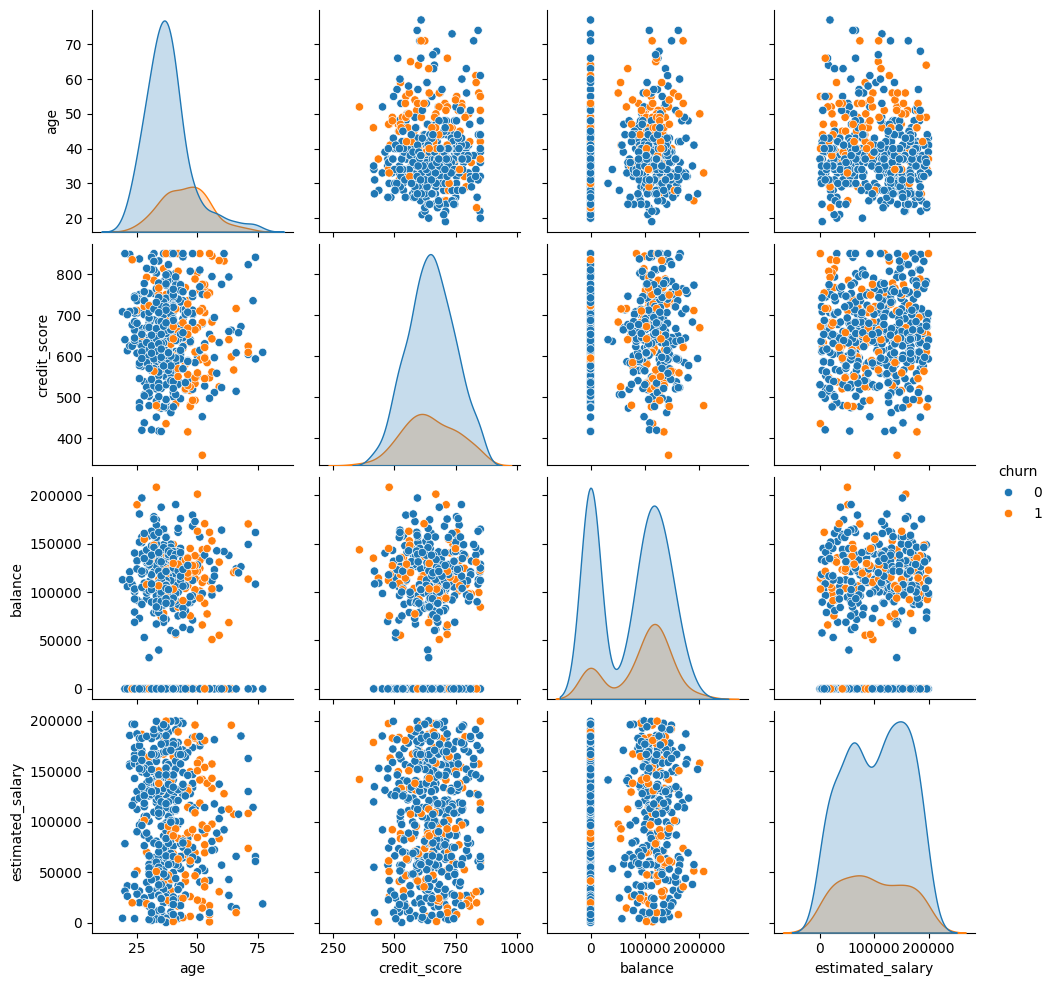

In [11]:
# Pairplot (sampled for performance)
sns.pairplot(df.sample(500), vars=['age','credit_score','balance','estimated_salary'], hue='churn')
plt.show()

### 3.Relationships & Trends

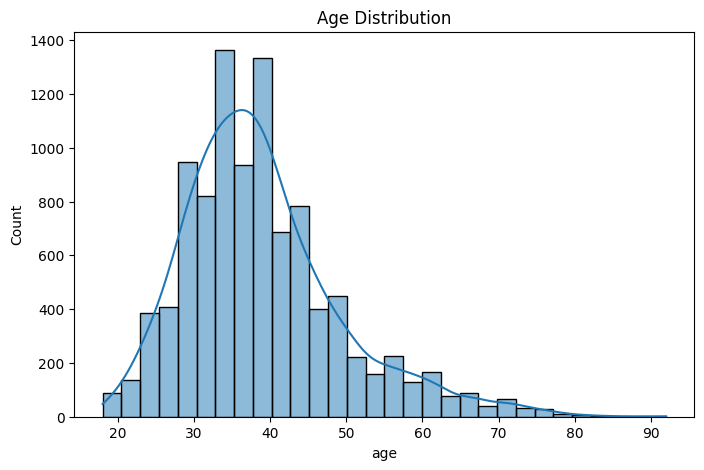

In [12]:
# Histogram of age
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

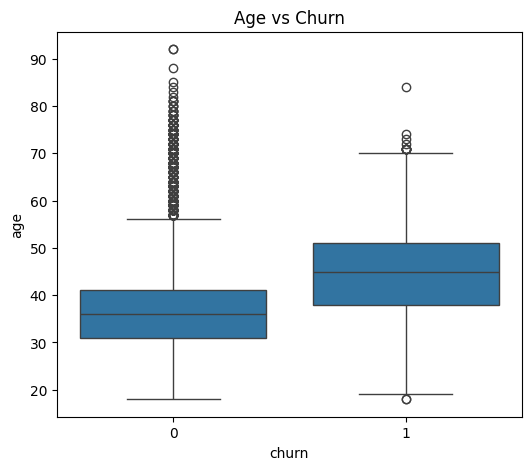

In [13]:
# Boxplot: Age vs Churn
plt.figure(figsize=(6,5))
sns.boxplot(x='churn', y='age', data=df)
plt.title("Age vs Churn")
plt.show()

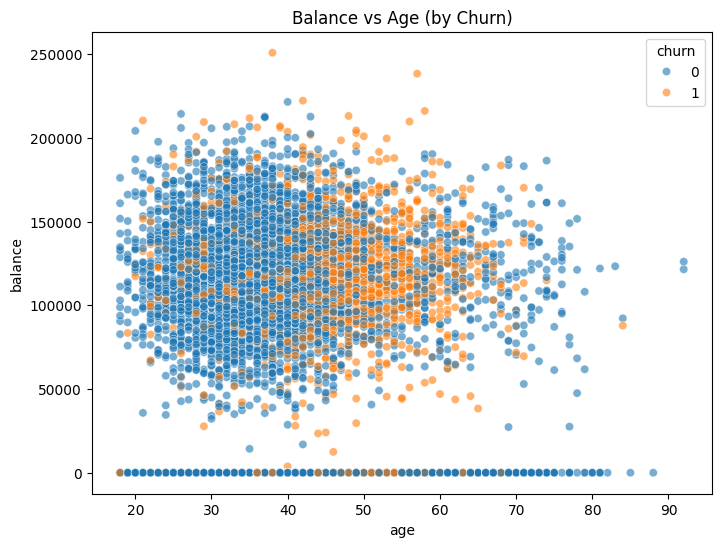

In [14]:
# Scatterplot: Balance vs Age
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='balance', hue='churn', data=df, alpha=0.6)
plt.title("Balance vs Age (by Churn)")
plt.show()

### 4.Distribution Visualizations

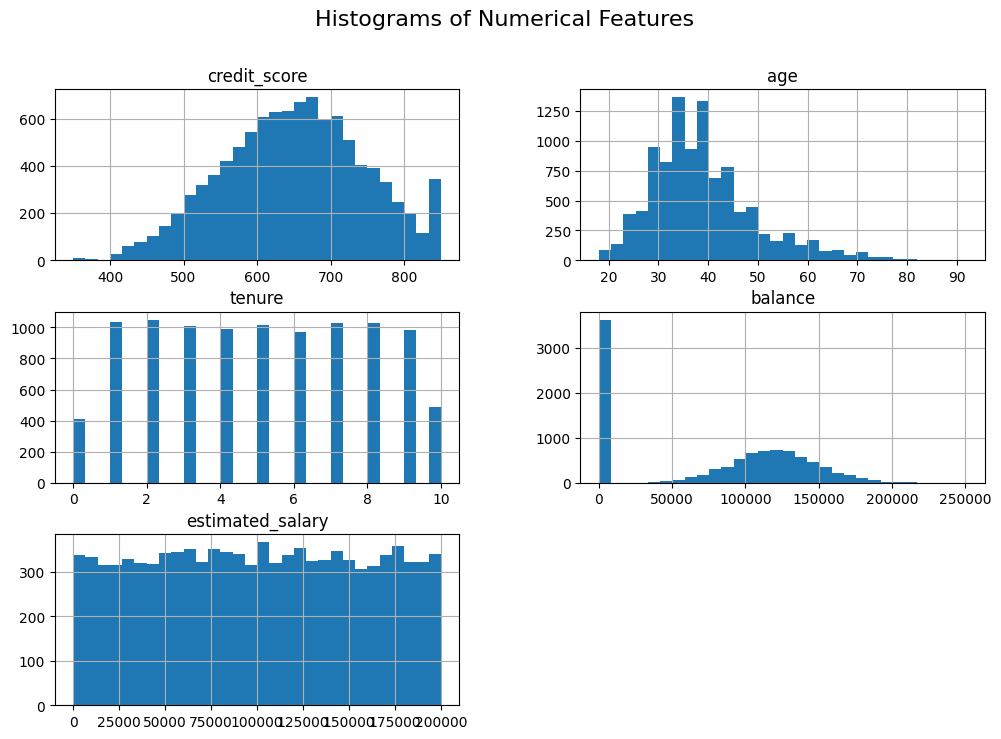

In [15]:
# Histograms of key numeric features
df[['credit_score','age','tenure','balance','estimated_salary']].hist(figsize=(12,8), bins=30)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

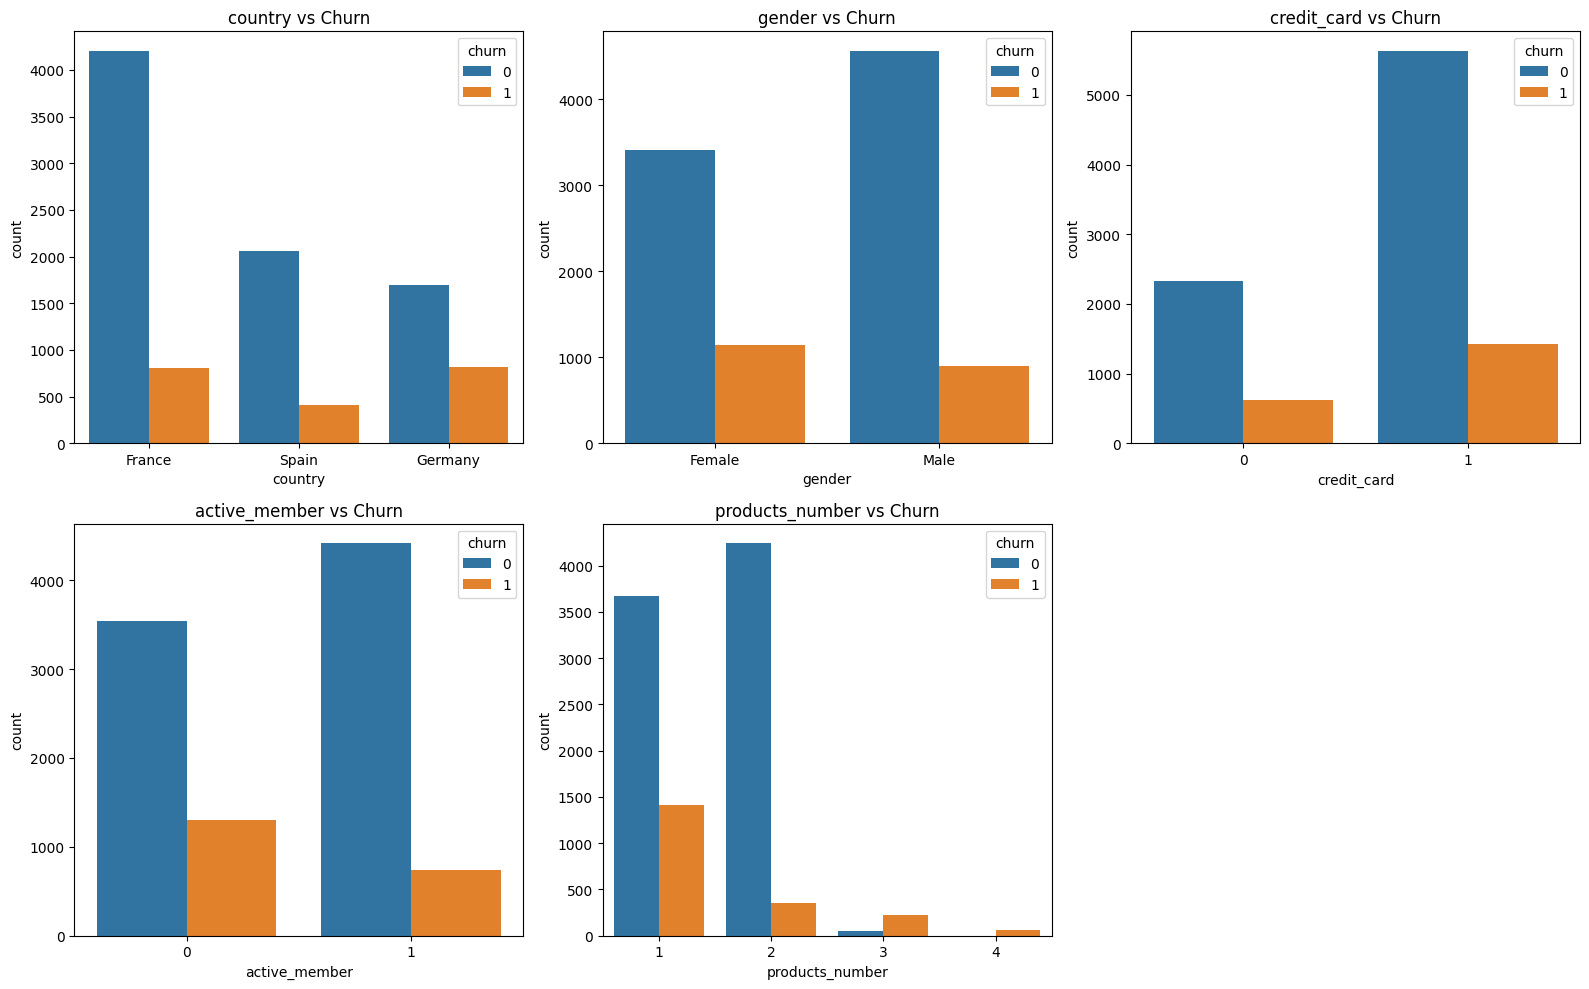

In [16]:
# Countplots for categorical variables
cat_cols = ['country','gender','credit_card','active_member','products_number']
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_cols,1):
    plt.subplot(2,3,i)
    sns.countplot(x=col, hue='churn', data=df)
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

### 5.Observations for Each Visual

In [18]:
print("\n Observations:")
print("1. Age: Older customers (40+) show higher churn rates.")
print("2. Balance: Customers with high balances are more likely to churn.")
print("3. Country: Germany has noticeably higher churn compared to France & Spain.")
print("4. Gender: Churn distribution is similar across genders.")
print("5. Credit Card & Active Member: Customers with credit cards or who are active churn less.")
print("6. Products: Customers with 3+ products show unusual churn behavior.")
print("7. Correlation Heatmap: No strong correlations (all < 0.3).")


 Observations:
1. Age: Older customers (40+) show higher churn rates.
2. Balance: Customers with high balances are more likely to churn.
3. Country: Germany has noticeably higher churn compared to France & Spain.
4. Gender: Churn distribution is similar across genders.
5. Credit Card & Active Member: Customers with credit cards or who are active churn less.
6. Products: Customers with 3+ products show unusual churn behavior.
7. Correlation Heatmap: No strong correlations (all < 0.3).
